# Libraries

In [138]:
# import libraries

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.utils import to_categorical

# Functions

In [139]:
# unpickle the files
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [140]:
# load all CIFAR
def load_CIFAR10():
    """ train_batches = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']
    test_batches = ['test_batch']
    data_dir = './data/cifar-10-batches-py/'
    
    train_data = []
    train_labels = []
    
    for batch_name in train_batches:
        batch_path = data_dir + batch_name
        batch_dict = unpickle(batch_path)
        train_data.append(batch_dict['data'])
        train_labels += batch_dict['labels']
    
    test_data = []
    test_labels = []
    
    for batch_name in test_batches:
        batch_path = data_dir + batch_name
        batch_dict = unpickle(batch_path)
        test_data.append(batch_dict['data'])
        test_labels += batch_dict['labels']

    train_data = np.concatenate(train_data)
    test_data = np.concatenate(test_data)
    
    #df_train = pd.DataFrame(train_data)
    #df_test = pd.DataFrame(test_data)

    # convert from integers to floats
    #df_train = df_train.astype('float32')
    #df_test = df_test.astype('float32')
    
    # scale image pixels to [0, 1]
    train_data, test_data = train_data / 255.0, test_data / 255.0

    # one hot encode target labels
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels) """

    train_images = np.zeros((50000, 32, 32, 3), dtype=np.uint8)
    train_labels = np.zeros((50000,), dtype=np.uint8)
    
    # get training data
    for i in range(5):
        train_dict = unpickle(f'./data/cifar-10-batches-py/data_batch_{i+1}')
        train_images[i*10000:(i+1)*10000] = train_dict[b'data'].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
        train_labels[i*10000:(i+1)*10000] = train_dict[b'labels']

    # get testing data
    test_dict = unpickle('./data/cifar-10-batches-py/test_batch')
    test_images = test_dict[b'data'].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    test_labels = np.array(test_dict[b'labels'])

    print(train_images)
    print(train_labels)

    return ((train_images, train_labels), (test_images, test_labels))

In [141]:
# define cnn model
def define_model():
    model = models.Sequential()
    # ...
    return model

In [142]:
# plot diagnostic learning curves
def show_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

In [143]:
# run the test
def run_test():
    # load dataset
    (train_data, train_labels), (test_data, test_labels) = load_CIFAR10()

    # verify data
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_data[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])
    plt.show()

    #define model
    model = define_model()

    # fit model
    history = model.fit(train_data, train_labels, epochs=100, batch_size=64, validation_data=(test_data, test_labels), verbose=0)
    
    # evaluate model
    _, acc = model.evaluate(test_data, test_labels, verbose=0)
    print('> %.3f' % (acc * 100.0))

    # show learning curves
    summarize_diagnostics(history)

# Load the Data

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

IndexError: invalid index to scalar variable.

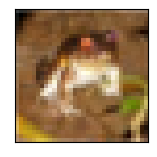

In [144]:
# import data
labels = unpickle("./data/cifar-10-batches-py/batches.meta")

run_test()

# Build Model